Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Fraud Cases: 473
Valid Transactions: 283253


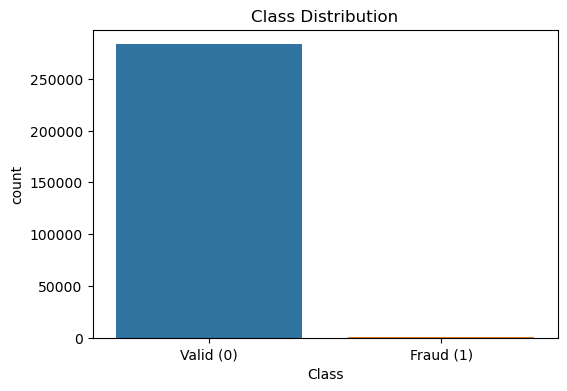

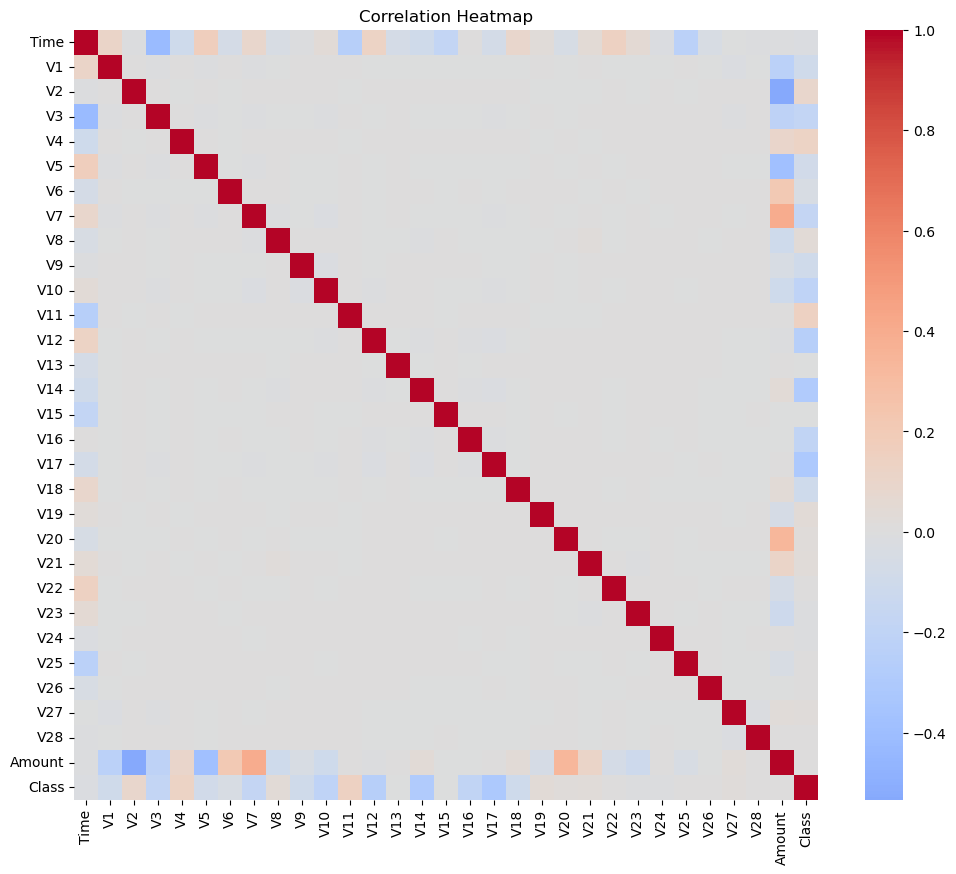


=== Random Forest Classifier Results ===
Accuracy: 0.9994713221645245
Precision: 0.9619047619047619
Recall: 0.7112676056338029
F1-Score: 0.8178137651821863
Matthews Corrcoef: 0.8269119730058251


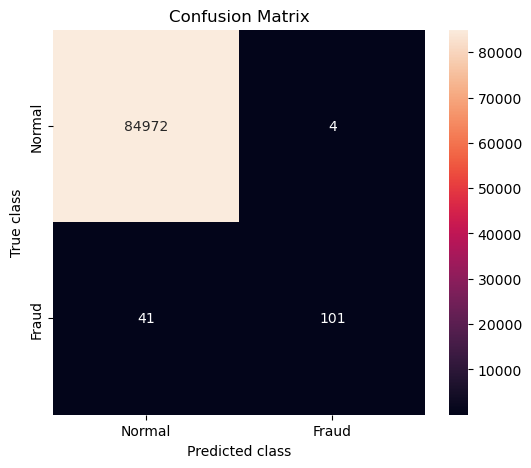

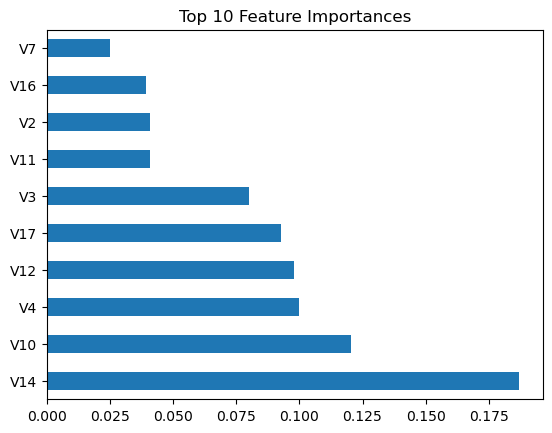


=== Logistic Regression Results ===
Accuracy: 0.9619234474494232
Precision: 0.03842716711349419
Recall: 0.9084507042253521
F1-Score: 0.073735352957988
Matthews Corrcoef: 0.1825131309621086

Cross-Validated F1 Scores (Random Forest): [0.87640449 0.82716049 0.81212121 0.85227273 0.82634731]
Mean CV F1 Score: 0.8388612465984687


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load dataset
data = pd.read_csv('/Users/sindhugunda/Desktop/CREDITCARD/creditcard.csv')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Check for nulls
print("Missing values:\n", data.isnull().sum())

# Class distribution
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
print("Fraud Cases:", len(fraud)) 
print("Valid Transactions:", len(valid)) 

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xticks([0,1], ['Valid (0)', 'Fraud (1)'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Features & labels
X = data.drop(['Class'], axis=1)
Y = data['Class']

# Split data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# ======= Model 1: Random Forest with balanced class weight =======
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

# ======= Evaluation =======
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

print("\n=== Random Forest Classifier Results ===")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Precision:", precision_score(yTest, yPred))
print("Recall:", recall_score(yTest, yPred))
print("F1-Score:", f1_score(yTest, yPred))
print("Matthews Corrcoef:", matthews_corrcoef(yTest, yPred))

# Confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

# ======= Feature Importance =======
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances")
plt.show()

# ======= Model 2: Logistic Regression =======
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(xTrain, yTrain)
yPred_lr = lr.predict(xTest)

print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(yTest, yPred_lr))
print("Precision:", precision_score(yTest, yPred_lr))
print("Recall:", recall_score(yTest, yPred_lr))
print("F1-Score:", f1_score(yTest, yPred_lr))
print("Matthews Corrcoef:", matthews_corrcoef(yTest, yPred_lr))

# ======= Cross Validation =======
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X, Y, cv=skf, scoring='f1')
print("\nCross-Validated F1 Scores (Random Forest):", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Fraud Cases: 473
Valid Transactions: 283253


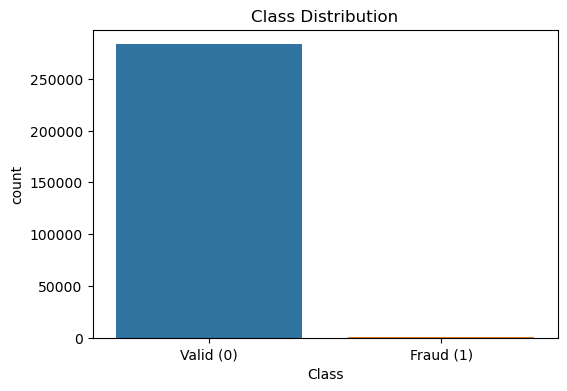

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load dataset
data = pd.read_csv('/Users/sindhugunda/Desktop/CREDITCARD/creditcard.csv')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Check for nulls
print("Missing values:\n", data.isnull().sum())

# Class distribution
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
print("Fraud Cases:", len(fraud)) 
print("Valid Transactions:", len(valid)) 

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xticks([0,1], ['Valid (0)', 'Fraud (1)'])
plt.show()

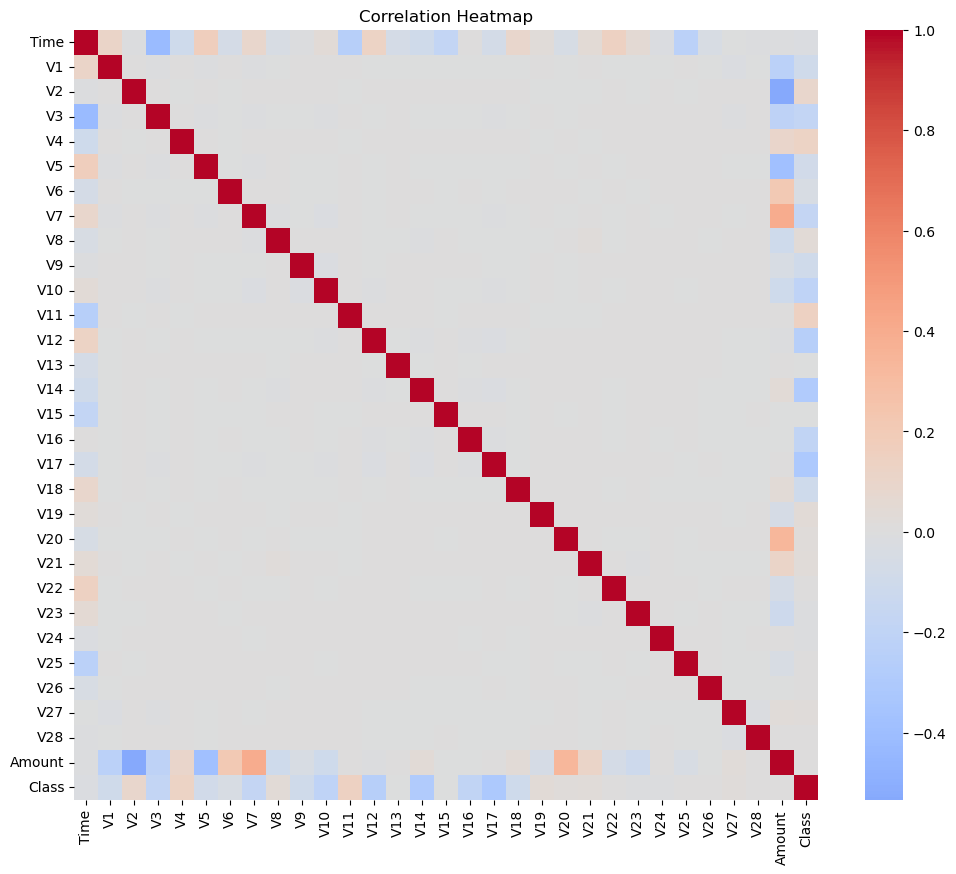

In [3]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [4]:
# Features & labels
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [5]:
# Split data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [6]:
# ======= Model 1: Random Forest with balanced class weight =======
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [7]:
# ======= Evaluation =======
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

print("\n=== Random Forest Classifier Results ===")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Precision:", precision_score(yTest, yPred))
print("Recall:", recall_score(yTest, yPred))
print("F1-Score:", f1_score(yTest, yPred))
print("Matthews Corrcoef:", matthews_corrcoef(yTest, yPred))



=== Random Forest Classifier Results ===
Accuracy: 0.9994713221645245
Precision: 0.9619047619047619
Recall: 0.7112676056338029
F1-Score: 0.8178137651821863
Matthews Corrcoef: 0.8269119730058251


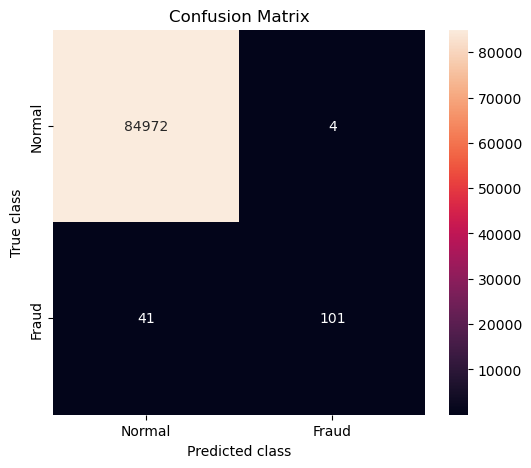

In [8]:
# Confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

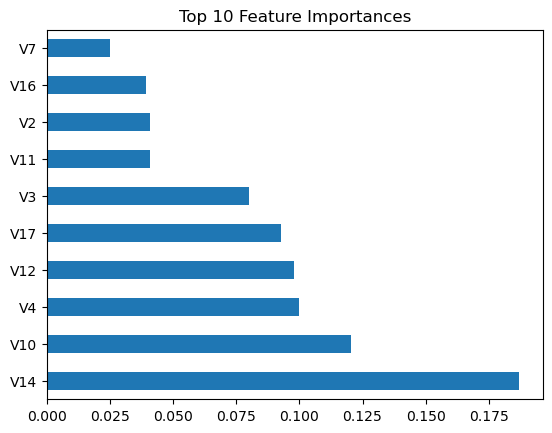

In [9]:
# ======= Feature Importance =======
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances")
plt.show()

In [10]:
# ======= Model 2: Logistic Regression =======
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(xTrain, yTrain)
yPred_lr = lr.predict(xTest)

print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(yTest, yPred_lr))
print("Precision:", precision_score(yTest, yPred_lr))
print("Recall:", recall_score(yTest, yPred_lr))
print("F1-Score:", f1_score(yTest, yPred_lr))
print("Matthews Corrcoef:", matthews_corrcoef(yTest, yPred_lr))



=== Logistic Regression Results ===
Accuracy: 0.9619234474494232
Precision: 0.03842716711349419
Recall: 0.9084507042253521
F1-Score: 0.073735352957988
Matthews Corrcoef: 0.1825131309621086


In [ ]:
# ======= Cross Validation =======
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X, Y, cv=skf, scoring='f1')
print("\nCross-Validated F1 Scores (Random Forest):", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))
